<a href="https://colab.research.google.com/github/pdrzxzz/risk-score-praso/blob/main/risk_score_praso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📥 Importing

In [60]:
!pip install lazypredict

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import re

# 🔄 Fetch data

In [62]:
df = pd.read_csv('praso-data.csv')

# 👁️ Glance of data

In [63]:
df.sample(5)

,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,cnae_descricao,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_idade_divida_mais_recente,serasa_credores,serasa_socio_tem_negativacao,ifood_contagem_avaliacoes,ifood_faixa_preco,google_maps_avaliacao,google_maps_contagem_avaliacoes,google_maps_tem_website,inadimplente
3851,CE,FORTALEZA,Pizza & Massas,206-2 - Sociedade Empresária Limitada,Fonte 2,47.21-1-02,Padaria e confeitaria com predominância de rev...,"(8000, 10000]","(600, 750]",0,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0
1491,CE,FORTALEZA,Restaurante Brasileiro,213-5 - Empresário (Individual),Fonte 2,56.11-2-01,Restaurantes e similares,"(3000, 5000]","(0, 25]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
6400,CE,FORTALEZA,Bar,213-5 - Empresário (Individual),Fonte 1,47.12-1-00,"Comércio varejista de mercadorias em geral, co...","(8000, 10000]","(600, 750]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
807,PB,JOAO PESSOA,Lanches & Salgados,213-5 - Empresário (Individual),Fonte 2,56.20-1-04,Fornecimento de alimentos preparados preponder...,"(200, 1000]","(1600, 2000]",0,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1
8697,AL,RIO LARGO,Lanches & Salgados,213-5 - Empresário (Individual),Fonte 5,56.20-1-04,Fornecimento de alimentos preparados preponder...,"(3000, 5000]","(900, 1150]",2,0,15.0,Alimentos e Bebidas,1,NaN,NaN,NaN,NaN,NaN,1


In [64]:
print(f"The dataset contains {df.shape[0]:,} rows and {df.shape[1]:,} columns.")

The dataset contains 12,458 rows and 20 columns.


In [65]:
# Fonts
df.value_counts('natureza_juridica').head(10)

,count
natureza_juridica,
213-5 - Empresário (Individual),9911
206-2 - Sociedade Empresária Limitada,2490
230-5 - Empresa Individual de Responsabilidade Limitada (de Natureza Empresária),26
205-4 - Sociedade Anônima Fechada,16
223-2 - Sociedade Simples Pura,4
224-0 - Sociedade Simples Limitada,4
204-6 - Sociedade Anônima Aberta,2
232-1 - Sociedade Unipessoal de Advocacia,2
203-8 - Sociedade de Economia Mista,1


In [66]:
# Fonts
df.value_counts('fonte_cliente').head(10)

,count
fonte_cliente,
Fonte 1,4524
Fonte 5,3937
Fonte 2,3361
Fonte 4,387
Fonte 3,249


In [67]:
# 10 cities with more costumers
df.value_counts('municipio').head(10)

,count
municipio,
FORTALEZA,2723
RECIFE,2213
JOAO PESSOA,1251
MACEIO,1137
JABOATAO DOS GUARARAPES,673
OLINDA,502
PAULISTA,402
CARUARU,361
CAUCAIA,294


In [68]:
# States with more costumers
df.value_counts('uf').head(10)

,count
uf,
PE,5641
CE,3949
PB,1631
AL,1237


In [69]:
# States with more costumers
df.value_counts('segmento_cliente').head(10)

,count
segmento_cliente,
Restaurante Brasileiro,2825
Mercearia & Mercado,1676
Doces & Confeitaria,1645
Lanches & Salgados,1558
Padaria,744
Pizza & Massas,703
Hambúrguer,459
Bar,421
Distribuidor,342


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12458 entries, 0 to 12457
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uf                                12458 non-null  object 
 1   municipio                         12458 non-null  object 
 2   segmento_cliente                  12458 non-null  object 
 3   natureza_juridica                 12458 non-null  object 
 4   fonte_cliente                     12458 non-null  object 
 5   cnae_codigo                       12458 non-null  object 
 6   cnae_descricao                    12458 non-null  object 
 7   capital_social                    12458 non-null  object 
 8   idade_cnpj                        12458 non-null  object 
 9   serasa_contagem_negativacoes      12458 non-null  int64  
 10  serasa_contagem_protestos         12458 non-null  int64  
 11  serasa_idade_divida_mais_recente  2356 non-null   float64
 12  sera

In [71]:
df.describe()

,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_idade_divida_mais_recente,serasa_socio_tem_negativacao,google_maps_tem_website,inadimplente
count,12458.000000,12458.000000,2356.000000,12458.000000,1038.0,12458.000000
mean,0.942447,1.034596,14.536927,0.480334,1.0,0.409697
std,11.040111,62.842488,14.169609,0.499633,0.0,0.491797
min,0.000000,0.000000,1.000000,0.000000,1.0,0.000000
25%,0.000000,0.000000,3.000000,0.000000,1.0,0.000000
50%,0.000000,0.000000,9.000000,0.000000,1.0,0.000000
75%,0.000000,0.000000,21.000000,1.000000,1.0,1.000000
max,912.000000,6917.000000,60.000000,1.000000,1.0,1.000000


# 🧹 Data Cleaning

## ❓ Null values?

In [72]:
df.isna().sum().sort_values(ascending=False)

,0
ifood_contagem_avaliacoes,11978
ifood_faixa_preco,11604
google_maps_avaliacao,11593
google_maps_contagem_avaliacoes,11420
google_maps_tem_website,11420
serasa_credores,10483
serasa_idade_divida_mais_recente,10102
uf,0
natureza_juridica,0
segmento_cliente,0


In [73]:
null_df = (df.isnull().sum()/len(df)*100).sort_values(ascending=True).reset_index()
x_axis_name = '% of null'
y_axis_name = 'column'
null_df = null_df.rename(columns={'index': y_axis_name, 0: x_axis_name})
fig = px.bar(null_df, x=x_axis_name, y=y_axis_name, orientation='h')
fig.update_layout(
    width=1200, height=500,
    margin=dict(t=100),
    title={
        'text': 'Null values per column (%)',
        'x': 0.5,
        'font': {
            'size': 30,
            }
        }
    )
fig.show()

7 columns have at least 80% of null values,  
i will drop them because it will simplifiy a lot,  
we might test with them later.

In [74]:
df = df.dropna(axis=1)
df.shape

(12458, 13)

In [75]:
null_df = (df.isnull().sum()/len(df)*100).sort_values(ascending=True).reset_index()
x_axis_name = '% of null'
y_axis_name = 'column'
null_df = null_df.rename(columns={'index': y_axis_name, 0: x_axis_name})
fig = px.bar(null_df, x=x_axis_name, y=y_axis_name, orientation='h')
fig.update_layout(
    width=1200, height=500,
    margin=dict(t=100),
    title={
        'text': 'Null values per column (%)',
        'x': 0.5,
        'font': {
            'size': 30,
            }
        }
    )
fig.show()

In [76]:
df.isna().sum().sum()

np.int64(0)

## 2️⃣ Any duplicated rows?

In [77]:
df.duplicated().sum()

np.int64(172)

In [78]:
df[df.duplicated(keep=False) & (df['segmento_cliente'] == 'Bar')]

,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,cnae_descricao,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_socio_tem_negativacao,inadimplente
1238,CE,FORTALEZA,Bar,213-5 - Empresário (Individual),Fonte 2,56.11-2-04,Bares e outros estabelecimentos especializados...,"(5000, 8000]","(900, 1150]",0,0,0,0
4796,CE,FORTALEZA,Bar,213-5 - Empresário (Individual),Fonte 2,56.11-2-04,Bares e outros estabelecimentos especializados...,"(5000, 8000]","(900, 1150]",0,0,0,0
7712,AL,MACEIO,Bar,213-5 - Empresário (Individual),Fonte 5,56.11-2-04,Bares e outros estabelecimentos especializados...,"(0, 1]","(4000, 5000]",0,0,0,0
11501,AL,MACEIO,Bar,213-5 - Empresário (Individual),Fonte 5,56.11-2-04,Bares e outros estabelecimentos especializados...,"(0, 1]","(4000, 5000]",0,0,0,0


We have duplicated rows, but it's fine.

Duplicated rows are different costumers with the same profile,   
which can be useful to strength the statistical signal of that profile in the model.

## ⏸️ Columns with same info?

In [79]:
df['cnae_descricao'].value_counts()

,count
cnae_descricao,
Restaurantes e similares,2226
"Lanchonetes, casas de chá, de sucos e similares",1827
"Comércio varejista de mercadorias em geral, com predominância de produtos alimentícios - minimercados, mercearias e armazéns",1204
Fornecimento de alimentos preparados preponderantemente para consumo domiciliar,1162
Fabricação de produtos de padaria e confeitaria com predominância de produção própria,876
...,...
Comércio atacadista de cacau,1
Representantes comerciais e agentes do comércio de peças e acessórios novos e usados para veículos automotores,1
Compra e venda de imóveis próprios,1


In [80]:
df['cnae_codigo'].value_counts()

,count
cnae_codigo,
56.11-2-01,2226
56.11-2-03,1827
47.12-1-00,1204
56.20-1-04,1162
10.91-1-02,876
...,...
46.23-1-05,1
45.30-7-06,1
68.10-2-01,1


There columns are determined by each other so we must drop one of them.

In [81]:
df = df.drop(columns=['cnae_descricao'])

## 🔤 Columns dtype conversion

### ❇️ Auxiliary conversion function

In [82]:
def interval_to_mean(val):
    """
    Calculate the mean of two numbers in a string interval like '(1.5, 3.0]'.

    If input is not a string, return it unchanged.
    """

    # If the value is not a string (e.g. it's NaN), return it as-is
    if not isinstance(val, str):
        return val  # keep NaN

    # Use regular expression to extract the two numbers from the interval string
    match = re.search(r'\(?([\d\.]+),\s*([\d\.]+)\]?', val)

    if match:
        # Extract the lower and upper bounds as floats
        low = float(match.group(1))
        high = float(match.group(2))

        # Return the mean of the two bounds
        return (low + high) / 2

### Original data types

In [83]:
df.dtypes

,0
uf,object
municipio,object
segmento_cliente,object
natureza_juridica,object
fonte_cliente,object
cnae_codigo,object
capital_social,object
idade_cnpj,object
serasa_contagem_negativacoes,int64
serasa_contagem_protestos,int64


### Execute conversions

In [84]:
df['uf'] = df['uf'].astype('category')

threshold = 20 # Cities with less than threshold companies would be on "Other" category.
#                This threshold is made to prevent model overfitting on city feature.
counts = df['municipio'].value_counts()
mask = df['municipio'].isin(counts[counts > threshold].index)
df['municipio'] = df['municipio'].where(mask, other='Other')
df['municipio'] = df['municipio'].astype('category')

df['segmento_cliente'] = df['segmento_cliente'].astype('category')

threshold = 30 #  natureza_juridica unique values that have less than threshold companies would be on "Other" category.
#                This threshold is made to prevent model overfitting on natureza_juridica feature.
counts = df['natureza_juridica'].value_counts()
mask = df['natureza_juridica'].isin(counts[counts > threshold].index)
df['natureza_juridica'] = df['natureza_juridica'].where(mask, other='Other')
df['natureza_juridica'] = df['natureza_juridica'].apply(lambda x: x[:5]).astype('category')

df['fonte_cliente'] = df['fonte_cliente'].astype('category')

threshold = 5 #  cnae_codigo unique values that have less than threshold companies would be on "Other" category.
#                This threshold is made to prevent model overfitting on cnae_codigo feature.
counts = df['cnae_codigo'].value_counts()
mask = df['cnae_codigo'].isin(counts[counts > threshold].index)
df['cnae_codigo'] = df['cnae_codigo'].where(mask, other='Other')
df['cnae_codigo'] = df['cnae_codigo'].astype('category')

df['capital_social'] = df['capital_social'].apply(interval_to_mean)
df['idade_cnpj'] = df['idade_cnpj'].apply(interval_to_mean)

df['serasa_socio_tem_negativacao'] = df['serasa_socio_tem_negativacao'].astype('int8')
df['inadimplente'] = df['inadimplente'].astype('int8')

### These columns were dropped (that's why this code is commented) ###
# These columns above are treated preserving their NaNs:
# df['serasa_idade_divida_mais_recente'] = df['serasa_idade_divida_mais_recente'].astype('Int64') # Int64 supports NaN
# df['serasa_credores'] = df['serasa_credores'].str.split(',\s*').str[0]
# df['ifood_contagem_avaliacoes'] = df['ifood_contagem_avaliacoes'].apply(interval_to_mean)
# df['ifood_faixa_preco'] = df['ifood_faixa_preco'].apply(lambda x: len(str(x)) if pd.notnull(x) else pd.NA).astype('Int64') # Int64 supports NaN
# df['google_maps_avaliacao'] = df['google_maps_avaliacao'].apply(interval_to_mean)
# df['google_maps_contagem_avaliacoes'] = df['google_maps_contagem_avaliacoes'].apply(interval_to_mean)
# df['google_maps_tem_website'] = df['google_maps_tem_website'].fillna(0).astype('int')

### Adjusted data types

In [85]:
df.dtypes

,0
uf,category
municipio,category
segmento_cliente,category
natureza_juridica,category
fonte_cliente,category
cnae_codigo,category
capital_social,float64
idade_cnpj,float64
serasa_contagem_negativacoes,int64
serasa_contagem_protestos,int64


In [86]:
df.sample(5)

,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_socio_tem_negativacao,inadimplente
5495,PB,JOAO PESSOA,Restaurante Brasileiro,213-5,Fonte 5,56.20-1-02,6500.0,525.0,0,0,1,1
11914,AL,MACEIO,Doces & Confeitaria,213-5,Fonte 5,10.93-7-01,0.5,4500.0,0,0,1,0
1981,CE,FORTALEZA,Doces & Confeitaria,206-2,Fonte 1,56.11-2-03,4000.0,675.0,0,0,0,0
4513,PE,SAO LOURENCO DA MATA,Doces & Confeitaria,206-2,Fonte 4,45.30-7-03,150000.0,1800.0,0,0,0,0
5710,PE,CARUARU,Restaurante Brasileiro,213-5,Fonte 5,56.11-2-01,12500.0,400.0,2,0,1,1


## 🎯Target Distribution

In [87]:
df['inadimplente'].value_counts(normalize=True)

,proportion
inadimplente,
0,0.590303
1,0.409697


In [88]:
fig = px.pie(df['inadimplente'].value_counts().reset_index(), names='inadimplente', values='count', color='inadimplente')

fig.update_traces(
    textinfo='percent+label',
    textfont_size=18,
    textfont_color='white'
)

fig.update_layout(
    title={
        'text': 'Target Distribution',
        'x': 0.5,
        'font': {
            'size': 30,
            }
        }
    )

fig.show()

The target variable is imbalanced,  
with approximately 59% of the samples labeled as False and 41% labeled as True.  
It's a mild imbalance, so we won't worry about it for now.

# 📶 Ploting and Analysis (EDA)

In [89]:
def plot_categorical_column(df, col):
    # Step 1: Calculate default ratio for each category
    default_ratio = (
        df[df['inadimplente'] == True]
        .groupby(col, observed=True)
        .size() / df.groupby(col, observed=True).size()
    )


    # Step 2: Sort categories by default ratio descending
    sorted_categories = default_ratio.sort_values(ascending=False).index.tolist()

    # Step 3: Plot using sorted order
    fig = px.histogram(df, y=col, color='inadimplente',
                      barmode='stack',
                      barnorm='percent',
                      title=f'{col.capitalize()} vs Inadimplente',
                      category_orders={col: sorted_categories})

    fig.update_layout(
        hoverlabel=dict(bgcolor='black'),
        yaxis={'categoryorder':'array', 'categoryarray': sorted_categories},
        xaxis_title='Percentage (%)',
        yaxis_title='Municipio',
    )



    fig.update_layout(xaxis_title=col, yaxis_title='Percentage (%)', bargap=0.2)
    fig.show()

## Categorical Features

In [90]:
plot_categorical_column(df, 'uf')

PE have the most inadimplente ratio with about 46%, followed by CE (39%), PB (35%) and AL (32%).

In [91]:
plot_categorical_column(df, 'municipio')

In [92]:
plot_categorical_column(df, 'segmento_cliente')

In [93]:
plot_categorical_column(df, 'natureza_juridica')

In [94]:
plot_categorical_column(df, 'fonte_cliente')

In [95]:
plot_categorical_column(df, 'cnae_codigo')

## Numerical Features

In [103]:
# Plot for 'capital_social'
plot_df_capital = df.copy()
plot_df_capital = plot_df_capital[plot_df_capital['capital_social'] < 1e6]

fig_capital = px.histogram(plot_df_capital, x='capital_social', color='inadimplente')
fig_capital.update_layout(title='capital_social Distribution by Inadimplente')
fig_capital.show()

In [104]:
# Plot for 'idade_cnpj'
plot_df_idade = df.copy()

fig_idade = px.histogram(plot_df_idade, x='idade_cnpj', color='inadimplente')
fig_idade.update_layout(title='idade_cnpj Distribution by Inadimplente')
fig_idade.show()

In [123]:
def plot_correlation_matrix(X_train, y_train, title_suffix=''):
    """
    Plot a correlation matrix between numeric features and target.

    Args:
        X_train (pd.DataFrame): Training features.
        y_train (np.array or pd.Series): Training target.
    """
    # Select only numeric columns
    numeric_df = X_train.select_dtypes(include='number').copy()

    # Compute correlation with target
    corr_with_target = numeric_df.corr()['inadimplente'].sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(
        x=corr_with_target.values,
        y=corr_with_target.index,
        palette='Spectral',
        orient='h'
    )

    plt.title(f'Feature Correlation with Target {title_suffix}', fontsize=16)
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Feature', fontsize=12)

    # Add labels to bars
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.2f', padding=3)

    sns.despine()
    plt.tight_layout()
    plt.show()


## Feature Correlation with Target

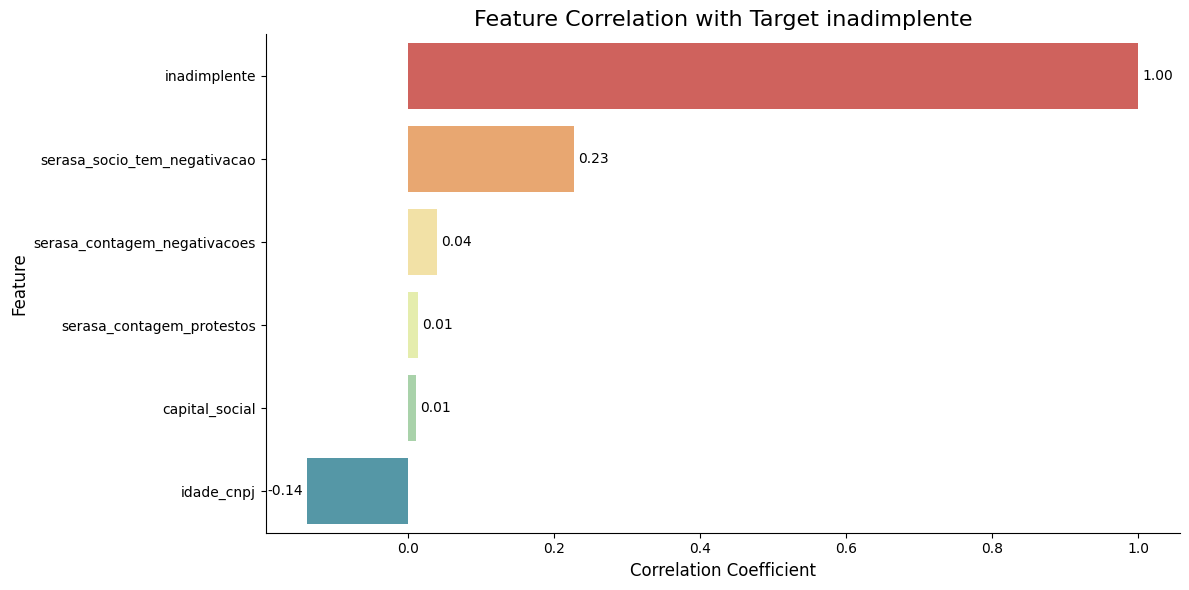

In [124]:
plot_correlation_matrix(df, df.iloc[:, -1:], title_suffix='inadimplente')

## Correlation of Features

In [128]:
# Compute correlation matrix (numeric only)
corr = df.corr(numeric_only=True)

# Plot with plotly.express
fig = px.imshow(
    corr,
    text_auto='.2f',  # format to 2 decimals
    color_continuous_scale='RdBu_r',
    title='Correlation Matrix'
)


fig.update_layout(
    width=700,
    height=600
)

fig.show()

# Pre-processing

In [99]:
df_arr = df.to_numpy()
df_arr.shape

(12458, 12)

In [105]:
categorical_cols = ['uf', 'municipio', 'segmento_cliente', 'natureza_juridica', 'fonte_cliente', 'cnae_codigo']

numerical_cols = ['capital_social', 'idade_cnpj', 'serasa_contagem_negativacoes', 'serasa_contagem_protestos']

In [106]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns
categorical_array = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame with one-hot encoded features
categorical_encoded_df = pd.DataFrame(
    categorical_array,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index
)

# Combine the numerical and one-hot encoded categorical features
df_one_hot_encoded = pd.concat(
    [df.drop(columns=categorical_cols), categorical_encoded_df],
    axis=1
)

df_one_hot_encoded

,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_socio_tem_negativacao,inadimplente,uf_AL,uf_CE,uf_PB,uf_PE,...,cnae_codigo_85.99-6-04,cnae_codigo_85.99-6-99,cnae_codigo_87.12-3-00,cnae_codigo_93.13-1-00,cnae_codigo_93.29-8-99,cnae_codigo_95.11-8-00,cnae_codigo_95.12-6-00,cnae_codigo_96.02-5-01,cnae_codigo_96.02-5-02,cnae_codigo_Other
0,9000.0,75.0,0,0,0,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4000.0,825.0,0,0,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,600.0,200.0,0,0,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1250.0,125.0,0,0,0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,600.0,1800.0,1,0,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12453,85000.0,4500.0,2,0,1,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12454,85000.0,6500.0,1,0,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12455,5500000.0,16500.0,0,0,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12456,600000.0,16500.0,0,0,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Standardize, Encode and PowerTransform

In [110]:
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler

# 1. One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_array = encoder.fit_transform(df[categorical_cols])
categorical_encoded_df = pd.DataFrame(
    categorical_array,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index
)

# 2. Apply PowerTransformer and StandardScaler to numerical columns
numerical_data = df[numerical_cols]

# PowerTransform
power_transformer = PowerTransformer()
numerical_powered = power_transformer.fit_transform(numerical_data)

# StandardScale
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_powered)

# Create DataFrame from scaled numerical data
numerical_scaled_df = pd.DataFrame(
    numerical_scaled,
    columns=numerical_cols,
    index=df.index
)

# 3. Combine both into one final DataFrame
df_preprocessed = pd.concat([df.drop(columns=categorical_cols).drop(columns=numerical_cols), numerical_scaled_df, categorical_encoded_df], axis=1)

df_preprocessed

,serasa_socio_tem_negativacao,inadimplente,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,uf_AL,uf_CE,uf_PB,uf_PE,...,cnae_codigo_85.99-6-04,cnae_codigo_85.99-6-99,cnae_codigo_87.12-3-00,cnae_codigo_93.13-1-00,cnae_codigo_93.29-8-99,cnae_codigo_95.11-8-00,cnae_codigo_95.12-6-00,cnae_codigo_96.02-5-01,cnae_codigo_96.02-5-02,cnae_codigo_Other
0,0,1,0.222727,-1.258892,-0.443647,-0.268718,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,-0.092377,0.038112,-0.443647,-0.268718,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,-0.814403,-0.782066,-0.443647,-0.268718,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,-0.537603,-1.019179,-0.443647,-0.268718,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,-0.814403,0.565297,2.158385,-0.268718,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12453,1,0,1.115516,1.263339,2.282059,-0.268718,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12454,0,0,1.115516,1.569816,2.158385,-0.268718,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12455,0,0,2.855061,2.421067,-0.443647,-0.268718,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12456,0,0,1.917311,2.421067,-0.443647,-0.268718,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train test split

In [112]:
from sklearn.model_selection import train_test_split

X, y = df_preprocessed.drop(columns=['inadimplente']), df_preprocessed['inadimplente']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9966, 178), (2492, 178), (9966,), (2492,))

# Model Training

In [116]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 4108, number of negative: 5858
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 9966, number of used features: 120
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412201 -> initscore=-0.354872
[LightGBM] [Info] Start training from score -0.354872


In [117]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.72,0.70,0.70,0.72,0.63
LGBMClassifier,0.72,0.70,0.70,0.71,0.49
LogisticRegression,0.71,0.69,0.69,0.71,0.45
LinearSVC,0.71,0.69,0.69,0.70,1.63
LinearDiscriminantAnalysis,0.71,0.69,0.69,0.70,0.92
RidgeClassifierCV,0.71,0.69,0.69,0.70,0.41
RidgeClassifier,0.71,0.69,0.69,0.70,0.21
SVC,0.71,0.69,0.69,0.70,27.24
CalibratedClassifierCV,0.71,0.69,0.69,0.70,6.17


In [132]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.74      0.79      0.77      1496
           1       0.66      0.59      0.62       996

    accuracy                           0.71      2492
   macro avg       0.70      0.69      0.69      2492
weighted avg       0.71      0.71      0.71      2492



# Model Evaluation

## On train

In [147]:
y_pred = model.predict(X_train)
y_true = y_train

### Classification Report

In [148]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78      5858
           1       0.69      0.62      0.65      4108

    accuracy                           0.73      9966
   macro avg       0.72      0.71      0.71      9966
weighted avg       0.72      0.73      0.72      9966



### Confusion Matrix

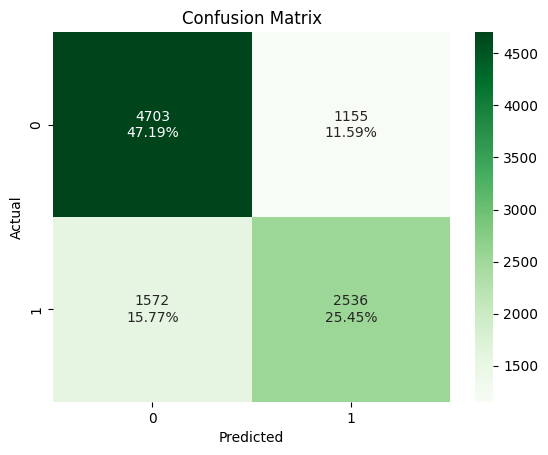

In [149]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_true, y_pred)

total = cm.sum()

# Create labels with both count and percentage of total
labels = np.array([
    [f"{count}\n{count/total:.2%}" for count in row]
    for row in cm
])

sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## On test

In [150]:
y_pred = model.predict(X_test)
y_true = y_test

### Classification Report

In [151]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77      1496
           1       0.66      0.59      0.62       996

    accuracy                           0.71      2492
   macro avg       0.70      0.69      0.69      2492
weighted avg       0.71      0.71      0.71      2492



### Confusion Matrix

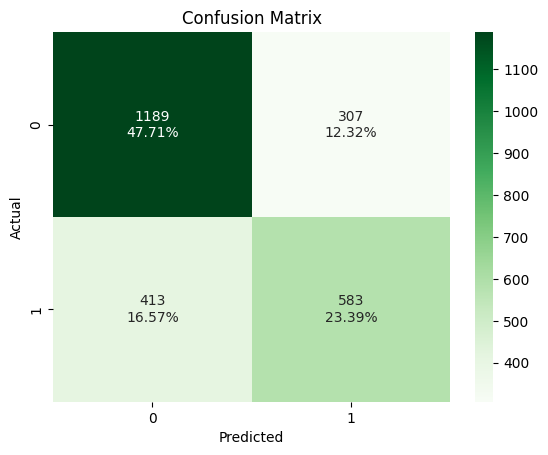

In [152]:
cm = confusion_matrix(y_true, y_pred)

total = cm.sum()

# Create labels with both count and percentage of total
labels = np.array([
    [f"{count}\n{count/total:.2%}" for count in row]
    for row in cm
])

sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ROC Curve